In [78]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados

# importando os dados

train_data = pd.read_csv(r"C:\Users\luizs\Documents\Python\projects\titanic - kaggle\datasets\train.csv")
print('train_data:')
display(train_data)

test_data = pd.read_csv(r"C:\Users\luizs\Documents\Python\projects\titanic - kaggle\datasets\test.csv")
print('test_data:')
display(test_data)

gender_submission = pd.read_csv(r"C:\Users\luizs\Documents\Python\projects\titanic - kaggle\datasets\gender_submission.csv")
print('gender_submission_data:')
display(gender_submission)

train_data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


test_data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


gender_submission_data:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
# Explorando agregações com colunas aleatórias

df = train_data[['Sex','Survived','Age']]

estatisticas = df.groupby('Survived')['Age'].mean().reset_index()
display(estatisticas)

estatisticas['Total'] = df.groupby('Survived')['Survived'].count()
display(estatisticas)

estatisticas['Rate'] = estatisticas['Total']/estatisticas['Total'].sum()
display(estatisticas)

estatisticas['Female'] = df.loc[df.Sex == 'female', ['Survived']].groupby('Survived')['Survived'].count()
display(estatisticas)

estatisticas['Male'] = df.loc[df.Sex == 'male', ['Survived']].groupby('Survived')['Survived'].count()
display(estatisticas)

estatisticas['Female_rate'] = estatisticas['Female']/estatisticas['Female'].sum()
display(estatisticas)

estatisticas['Male_rate'] = estatisticas['Male']/estatisticas['Male'].sum()
display(estatisticas)

estatisticas['Female_share'] = estatisticas['Female']/estatisticas['Total']
display(estatisticas)


estatisticas['Male_share'] = estatisticas['Male']/estatisticas['Total']
display(estatisticas)

# estatisticas['Male_share'] = estatisticas['Male']/

,Survived,Age
0,0,30.626179
1,1,28.343690


,Survived,Age,Total
0,0,30.626179,549
1,1,28.343690,342


,Survived,Age,Total,Rate
0,0,30.626179,549,0.616162
1,1,28.343690,342,0.383838


,Survived,Age,Total,Rate,Female
0,0,30.626179,549,0.616162,81
1,1,28.343690,342,0.383838,233


,Survived,Age,Total,Rate,Female,Male
0,0,30.626179,549,0.616162,81,468
1,1,28.343690,342,0.383838,233,109


,Survived,Age,Total,Rate,Female,Male,Female_rate
0,0,30.626179,549,0.616162,81,468,0.257962
1,1,28.343690,342,0.383838,233,109,0.742038


,Survived,Age,Total,Rate,Female,Male,Female_rate,Male_rate
0,0,30.626179,549,0.616162,81,468,0.257962,0.811092
1,1,28.343690,342,0.383838,233,109,0.742038,0.188908


,Survived,Age,Total,Rate,Female,Male,Female_rate,Male_rate,Female_share
0,0,30.626179,549,0.616162,81,468,0.257962,0.811092,0.147541
1,1,28.343690,342,0.383838,233,109,0.742038,0.188908,0.681287


,Survived,Age,Total,Rate,Female,Male,Female_rate,Male_rate,Female_share,Male_share
0,0,30.626179,549,0.616162,81,468,0.257962,0.811092,0.147541,0.852459
1,1,28.343690,342,0.383838,233,109,0.742038,0.188908,0.681287,0.318713


In [87]:
from sklearn.ensemble import RandomForestClassifier # importar o algorítmo de classificação random forest

y = train_data["Survived"] # variavel dependente

print('train_data_y (y):')
display(pd.DataFrame(y))

features = ["Pclass", "Sex", "SibSp", "Parch"] # variaveis independentes
X = pd.get_dummies(train_data[features]) # variaveis independentes de treino
X_test = pd.get_dummies(test_data[features]) # variaveis independentes de teste

print('train_data_features (X):')
display(X)

print('test_data_features (X_test):')
display(X_test)

# treinando o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#n_estimator: quantidade de árvores a serem usadas
#max_depth: profundidade máxima de cada árvore. Se este valor for muito alto, o modelo fica propenso a overfiting
#random_state: reprodutibilidade dos resultados. Quando = 1 garante que sempre obetrá o mesmo resultado desde que não se altere a ordem das operações

model.fit(X,y) # modelo aprende com os dados de treino

# realizando predições
predictions = model.predict(X_test)
y_pred = pd.Series(predictions)
y_test = gender_submission["Survived"]

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) # cria-se um dataframe com o id do passageiro e o resultado da predição
output.to_csv('submission.csv', index=False) # exporta predição para csv
print("Submission successfully saved")

train_data_y (y):


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


train_data_features (X):


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True
...,...,...,...,...,...
886,2,0,0,False,True
887,1,0,0,True,False
888,3,1,2,True,False
889,1,0,0,False,True


test_data_features (X_test):


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,False,True
1,3,1,0,True,False
2,2,0,0,False,True
3,3,0,0,False,True
4,3,1,1,True,False
...,...,...,...,...,...
413,3,0,0,False,True
414,1,0,0,True,False
415,3,0,0,False,True
416,3,0,0,False,True


Submission successfully saved


accuracy:  0.97


,Feature,Importance
3,Sex_female,0.342297
4,Sex_male,0.284667
0,Pclass,0.215508
2,Parch,0.080406
1,SibSp,0.077122


classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       266
           1       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

Curva ROC: 0.9661654135338346
cross-validation acuracy:
[0.76536313 0.80337079 0.80898876 0.79213483 0.8258427 ]


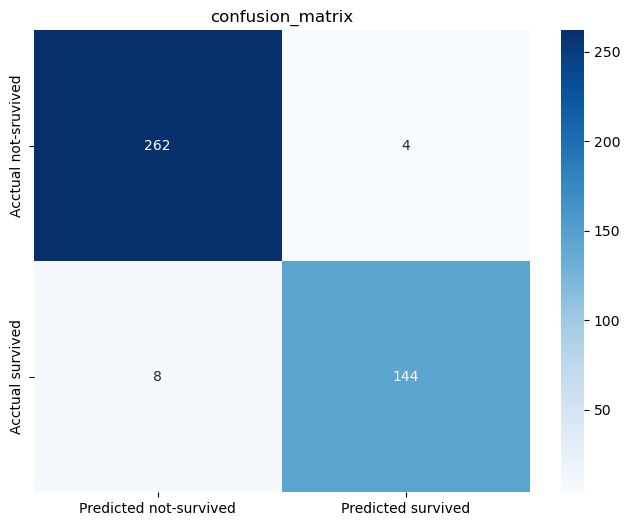

In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics  import roc_curve, auc

# accuracy - mede a porcentagem de acerto das previsões
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy: .2f}')

# importacia das features
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
display(feature_importance)

# classification report - apresenta métricas para cada classe
classification_report = classification_report(y_test, y_pred)
print('classification report:')
print(classification_report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print('Curva ROC:', auc_score)

# cross-validation - estima a capacidade de generalização para novos conjuntos de dados (evitar overfiting) dividindo o conjunto de dados em folds
scores = cross_val_score(model, X, y, cv=5)
print('cross-validation acuracy:')
print(scores)

# confusion matrix - ilustra a distribuição dos acertos e erros
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index=['Acctual not-sruvived', 'Acctual survived'], columns=['Predicted not-survived', 'Predicted survived'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('confusion_matrix')
plt.show()